In [ ]:
""" P-53-3 """

In [1]:
import sys, os
from time import time
if '../' not in sys.path:
    sys.path.insert(0, '../')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from modules.paths import Experiment
from modules.background import GLMCorrection
from modules.io import IO

%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
tickpad = 0
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['axes.labelsize'] = 8
plt.rcParams['axes.labelcolor'] = 'k'
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['axes.labelpad'] = 0
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['xtick.major.size'] = 3
plt.rcParams['xtick.minor.size'] = 1
plt.rcParams['xtick.major.pad'] = tickpad
plt.rcParams['xtick.labelsize'] = 7
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['ytick.major.size'] = 3
plt.rcParams['ytick.minor.size'] = 1
plt.rcParams['ytick.major.pad'] = tickpad
plt.rcParams['ytick.labelsize'] = 7
plt.rcParams['ytick.direction'] = 'out'

In [3]:
# Load paths to each set of experiments
loc = '/Volumes/bernasek_t5/pnt_manuscript/microscopy/yan_clones/'
#loc = '/Users/Sebi/Desktop/clones/'
control_path = os.path.join(loc, 'control/slices/w-eyFLP_PntGFP_FRT40A_PntGFP_Ubi-mRFPnls_FRT40A')
mutant_path = os.path.join(loc, 'perturbation/slices/w-eyFLP_PntGFP_YanE833_FRT40A_PntGFP_Ubi-mRFPnls_FRT40A')
control_exp = Experiment(control_path)
perturbation_exp = Experiment(mutant_path)
experiments = dict(control=control_exp, perturbation=perturbation_exp)

# Load disc

In [118]:
# C-4-0
# P-53-3
exp = experiments['perturbation']
stack = exp[exp.disc_names.index(42)]
layer = stack[3]

# Segmentation

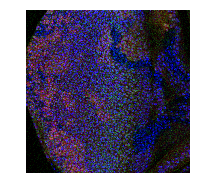

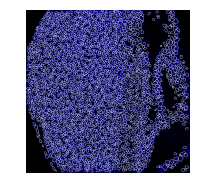

In [30]:
figsize = (3, 3)
fig0 = layer.show(segments=False, figsize=figsize)
fig1 = layer.get_channel('b').show(segments=True, figsize=figsize, lw=.25, color='w')

fig0.savefig('../graphics/example_layer.pdf', dpi=300, format='pdf', transparent=True, rasterized=True)
fig1.savefig('../graphics/example_segmentation.pdf', dpi=300, format='pdf', transparent=True, rasterized=True)

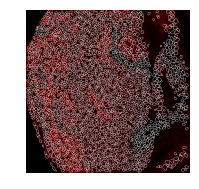

In [119]:
figsize = (3, 3)
fig1 = layer.get_channel('r').show(segments=True, figsize=figsize, lw=.25, color='w')

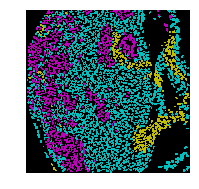

In [163]:
from matplotlib.colors import ListedColormap
label_to_kmlabel = dict(zip(layer.df.id, layer.df.km_label))
label_to_kmlabel[0] = 3
label_to_kmlabel = np.vectorize(label_to_kmlabel.get)
mask = label_to_kmlabel(layer.labels)

fig, ax = plt.subplots(figsize=figsize)
cmap = ListedColormap(['y', 'c', 'm', 'k'], N=4)
ax.imshow(mask, cmap=cmap, vmin=0, vmax=4)
_ = ax.axis('off')
#fig.savefig('../graphics/genotype_assignment.pdf', dpi=300, format='pdf', transparent=True, rasterized=True)

# Bleed-through control

In [5]:
from copy import deepcopy
from modules.masking import Mask

In [6]:
seg_params = stack.load_metadata()['params']['segmentation_kw']
corr = GLMCorrection(layer, niters=20, resample=True, resample_cutoff=99.999, seg_params=seg_params)

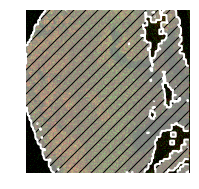

In [33]:
rg = deepcopy(layer.im)
rg[:,:,-1] = 0
mask = Mask(corr.bg_mask)
fig2 = plt.figure(figsize=figsize)
ax = plt.gca()
ax.imshow(rg)
mask.add_contourf(ax, alpha=0.5, hatches=['//'])
mask.add_contour(ax, lw=2, color='w')
ax.axis('off')

fig2.savefig('../graphics/background_selection.pdf', dpi=300, format='pdf', transparent=True, rasterized=True)

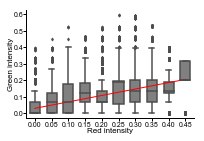

In [16]:
corr.show_fit(mode='box', bin_size=0.05)
fig3 = corr.figs['background_fit']
fig3.savefig('../graphics/rg_correlation.pdf', dpi=300, format='pdf', transparent=True, rasterized=True)

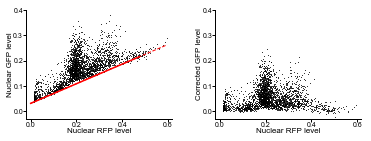

In [18]:
corr.show_correction()
fig4 = corr.figs['background_correction']
for ax in fig4.axes:
    ax.set_ylim(-0.03, 0.4)
    ax.set_title('')
fig4.savefig('../graphics/rg_correction.pdf', dpi=300, format='pdf', transparent=True, rasterized=True)

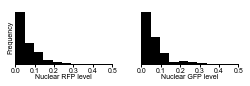

In [115]:
fig = corr.show_pixel_distributions(original=True)
for ax in fig.axes:
    ax.set_xlim(0, 0.5)
    ax.set_xticks(np.arange(0, .55, .1))
#fig.savefig('../graphics/pixels_raw.pdf', dpi=300, format='pdf', transparent=True, rasterized=True)

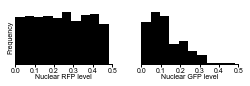

In [116]:
fig = corr.show_pixel_distributions()
for ax in fig.axes:
    ax.set_xlim(0, 0.5)
    ax.set_xticks(np.arange(0, .55, .1))
#fig.savefig('../graphics/pixels_resampled.pdf', dpi=300, format='pdf', transparent=True, rasterized=True)

# Clone annotation

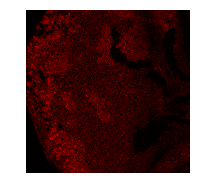

In [39]:
fig5 = layer.get_channel('r').show(segments=False, figsize=figsize)
fig5.savefig('../graphics/layer_rfp.pdf', dpi=300, format='pdf', transparent=True)

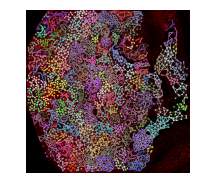

In [41]:
fig6 = layer.plot_graph(figsize=figsize, node_size=.25, lw=1, ec='w')
fig6.savefig('../graphics/layer_clustering.pdf', dpi=300, format='pdf', transparent=True, rasterized=True)

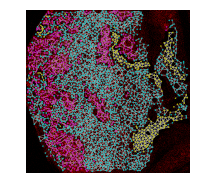

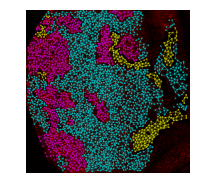

In [42]:
from matplotlib.colors import ListedColormap

cmap = ListedColormap(['y', 'c', 'm'], 'indexed', 3)
fig7 = layer.plot_graph(figsize=figsize, node_size=.25, lw=1, colorby='km_label', node_cmap=cmap, disconnect=False, ec='w')

cmap = ListedColormap(['y', 'c', 'm'], 'indexed', 3)
fig8 = layer.plot_graph(figsize=figsize, node_size=.25, lw=1, colorby='genotype', node_cmap=cmap, disconnect=True)

fig7.savefig('../graphics/layer_annotation_raw.pdf', dpi=300, format='pdf', transparent=True, rasterized=True)
fig8.savefig('../graphics/layer_annotation_final.pdf', dpi=300, format='pdf', transparent=True, rasterized=True)

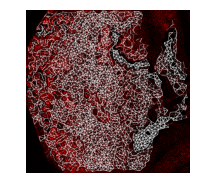

In [166]:
fig = layer.plot_graph(figsize=figsize, node_size=0, lw=1, ec='w', disconnect=False)
fig.savefig('../graphics/triangulation.pdf', dpi=300, format='pdf', transparent=True, rasterized=True)

In [ ]:
# boundary figure 

from matplotlib.colors import ListedColormap

# create axis
fig, ax = plt.subplots(figsize=(3, 3))
_ = layer.get_channel('r').show(ax=ax, segments=False, cmap=None)
_ = ax.axis('off')
cmap = ListedColormap(['y', 'c', 'm'], 'indexed', 3)


fg = layer.df[~layer.df.boundary]
ax.scatter(fg.centroid_x, fg.centroid_y, c=fg.genotype, s=1, cmap=cmap, vmin=0, vmax=3)

fig.savefig('../graphics/boundary_selection.pdf', dpi=300, format='pdf', transparent=True, rasterized=True)

In [6]:
exp = experiments['perturbation']
stack = exp[exp.disc_names.index(42)]
layer = stack[3]

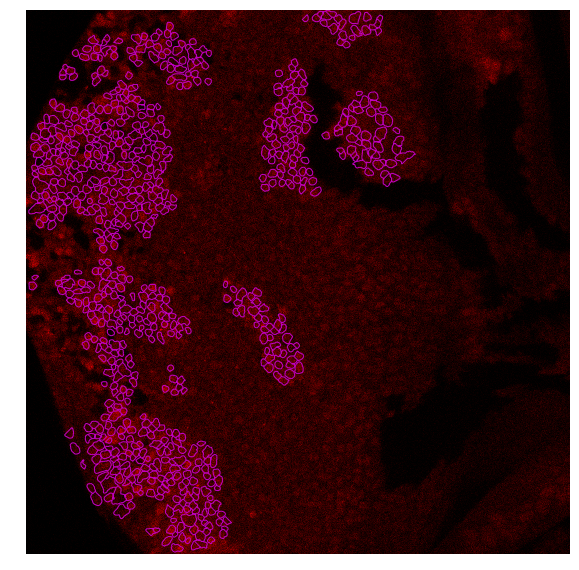

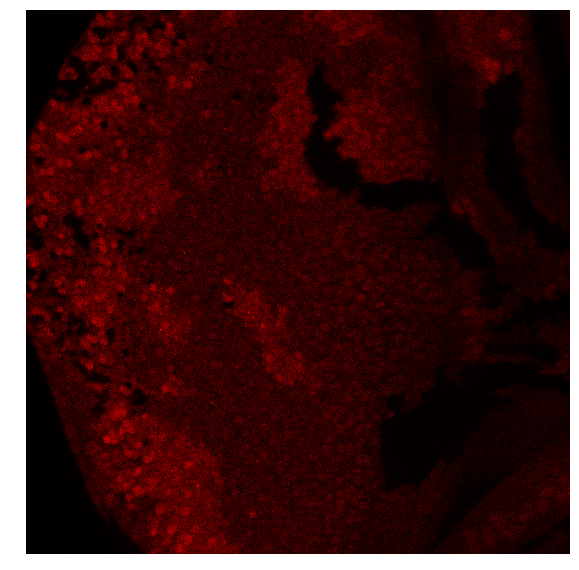

In [40]:
fig, ax = plt.subplots(figsize=(10, 10))
_ = layer.get_channel('r').show(segments=False, ax=ax)

colors = {0:'y', 1:'c', 2:'m', -1:'w'}
for g in layer.df.groupby('genotype'):
    g_df = pd.DataFrame.from_records(g[-1])
    genotype = g_df.genotype.unique()[0]
    if genotype in (2,):
        mask = np.isin(layer.labels, g_df.id)
        ax.contour(mask, [0.25], linewidths=[1], colors=[colors[genotype]])

fig, ax = plt.subplots(figsize=(10, 10))
_ = layer.get_channel('r').show(segments=False, ax=ax)